In [46]:
%matplotlib inline 

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import IPython
import sklearn
import mglearn
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [29]:
print("Keys of Iris Dataset:\n{}".format(iris_dataset.keys()))

Keys of Iris Dataset:
dict_keys(['DESCR', 'target', 'data', 'feature_names', 'target_names'])


In [30]:
#print(iris_dataset['DESCR'])

In [31]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [32]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [33]:
print("Type of Data {}".format(type(iris_dataset['data'])))

Type of Data <class 'numpy.ndarray'>


In [34]:
print("Shape of Data: {}".format(iris_dataset['data'].shape))

Shape of Data: (150, 4)


In [35]:
print("First Five Columns of Data:\n{}".format(iris_dataset['data'][:5]))

First Five Columns of Data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [36]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [38]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [39]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


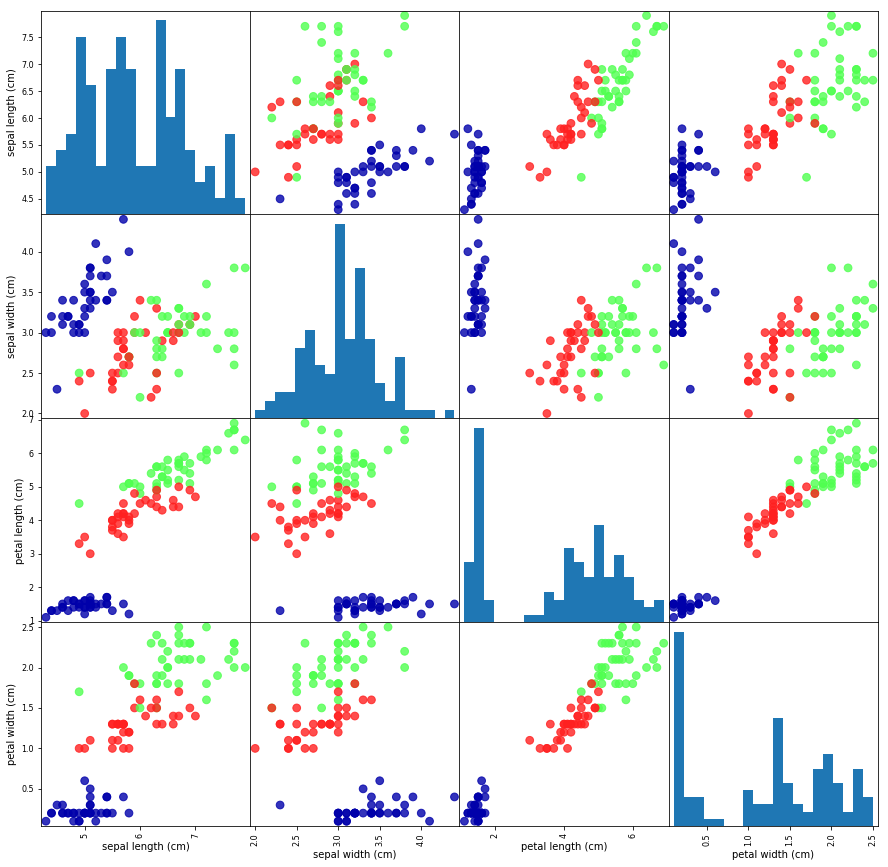

In [47]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix (pair plot) from the dataframe, color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                       hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [51]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted Target Name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted Target Name: ['setosa']


In [52]:
y_pred = knn.predict(X_test)
print("Test Set Predictions: {}".format(y_pred))

Test Set Predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [53]:
print("Test Set Score: {:.2f}".format(np.mean(y_pred == y_test)))

Test Set Score: 0.97


In [54]:
print("Test Set Score: {:.2f}".format(knn.score(X_test, y_test)))

Test Set Score: 0.97
